<a href="https://colab.research.google.com/github/cu-applied-math/appm-4600-numerics/blob/main/Demos/Ch1_RatesOfConvergence.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convergence rate demos
released under BSD 3-clause license

In [2]:
import numpy as np
import matplotlib.pyplot as plt

import matplotlib as mpl
mpl.rcParams['mathtext.fontset'] = 'cm'  # to get latex fonts, i.e., "computer modern"
# See plotting cheat-sheets at https://github.com/matplotlib/cheatsheets

n   = np.arange(1,1e3)

## Convergence

We talk about convergence of $x_n \rightarrow x$, though usually the quantity $x_n$ represents an error, so the limit is $x=0$. So from now on in this demo, we assume the limit is $0$ (some authors switch to the notation $e_n$ or $\epsilon_n$ to make it clear that this is an error and the limit is $0$).

- $x_n = 1/\sqrt{n}$ or $x_n = 1/n$ or $x_n = 1/n^2$ are all **sublinearly** convergent.  On a log-log plot, this is a straight line (and the slope gives us the exponent).

- $x_n = C \cdot \rho^n$ for $|\rho|<1$ is **linearly** convergent  (on a log-linear plot, this is a straight line). Another way to say this is that linear convergence is when we have $\boxed{\log(x_n) = a\cdot n + b}$ where $a = \log(\rho)$ and $b=\log(C)$.  Error is reduced by a constant factor (a factor of $\rho$) every step.  For linear convergence, the rate $\rho$ **is** important, since $\rho=1/2$ is great, whereas $\rho = 1- 10^{-5}$ is very bad.

- $x_n = C \cdot c^{2^n}$ is **quadratically** convergent (this looks like linear convergence, but then suddenly the error goes to zero extremely fast).  Another way to say this is $\log(x_{n+1}) = 2 \log(x_n) + \text{constant}$. Eventually, the number of accurate digits doubles at every iteratinon.

- More generally, $x_n = C\cdot c^{\alpha^n}$ is **convergence of order $\alpha$**.  For numerical methods, this usually drops below machine precision so quickly (at which point it stops decreasing and becomes flat) that it is hard to detect the order $\alpha$.  
  - If we take logarithms and let $C=1$ so $\log(C)=0$, we have $$\log(x_n) = \log(C) + \alpha^n \log(c) = \alpha^n \log(c)$$
  and $$\log(x_{n+1}) = \log(C) + \alpha^{n+1} \log(c) =  \alpha \cdot \alpha^n\log(c) = \alpha \log(x_n).$$
  So we look for a relationship like $\log(x_{n+1}) = \alpha \log(x_n)$.

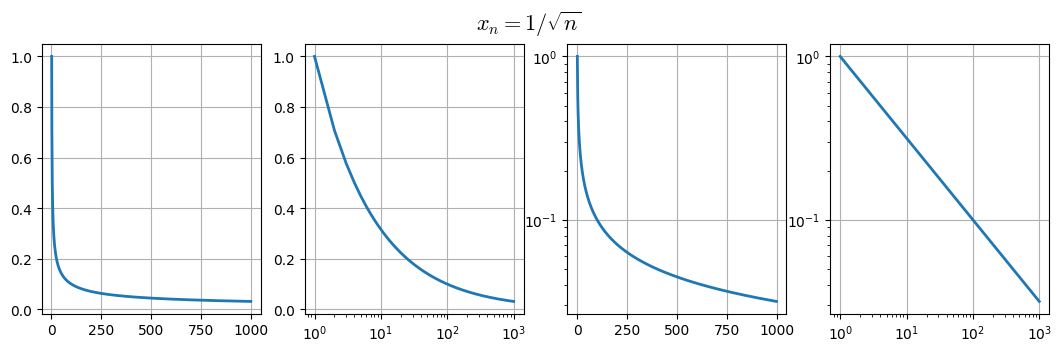

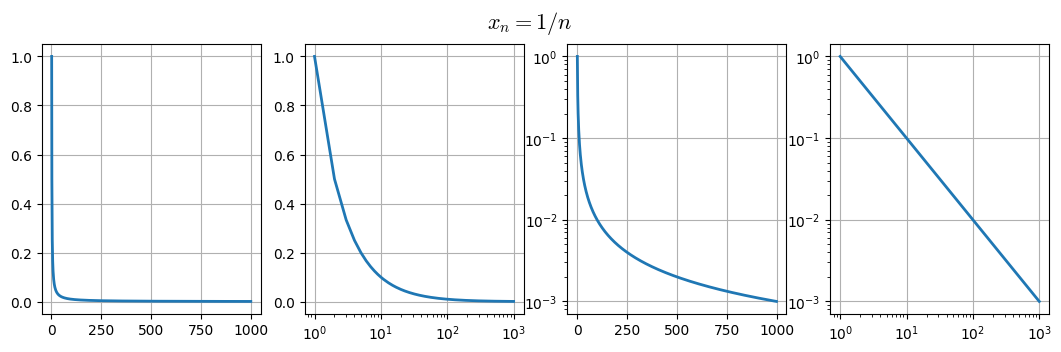

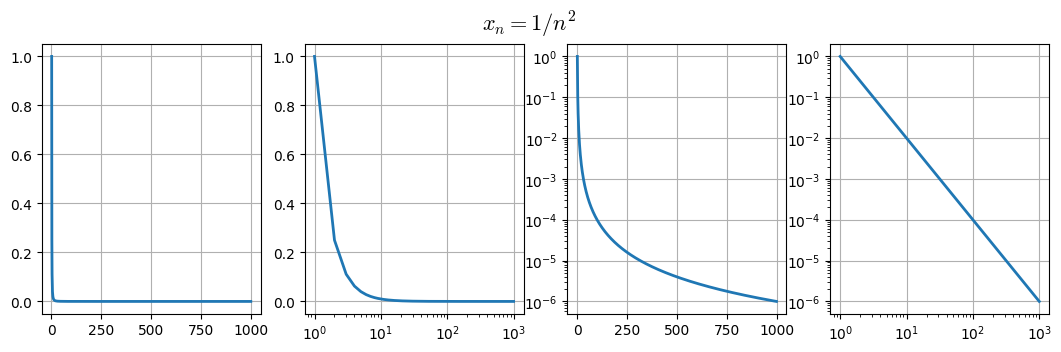

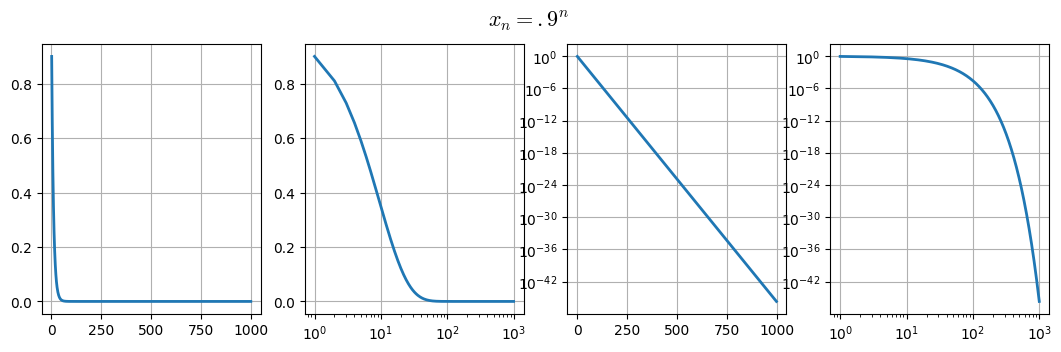

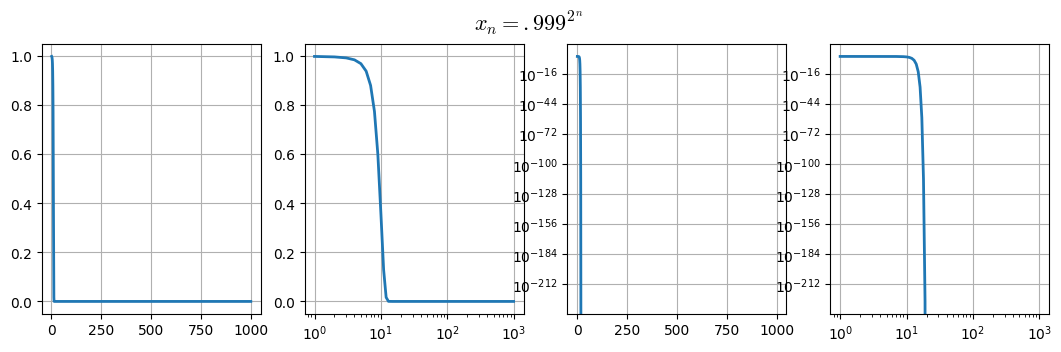

In [9]:
def makePlots( fcn, name):
  fig, axs = plt.subplots(1,4)
  fig.set_size_inches(13,3.5)
  for i in range(4):
    axs[i].plot( n,fcn(n),linewidth=2.0)
    axs[i].grid()
  axs[1].set_xscale('log')
  axs[2].set_yscale('log')
  axs[3].set_xscale('log')
  axs[3].set_yscale('log')
  fig.suptitle(name,fontsize=16);
makePlots( lambda n: 1/np.sqrt(n), r'$x_n = 1/\sqrt{n}$')
makePlots( lambda n: 1/n, r'$x_n = 1/n$')
makePlots( lambda n: 1/(n**2), r'$x_n = 1/n^2$')
makePlots( lambda n: .9**n, r'$x_n = .9^n$')
makePlots( lambda n: (.999)**(2**n), r'$x_n = .999^{2^n}$')

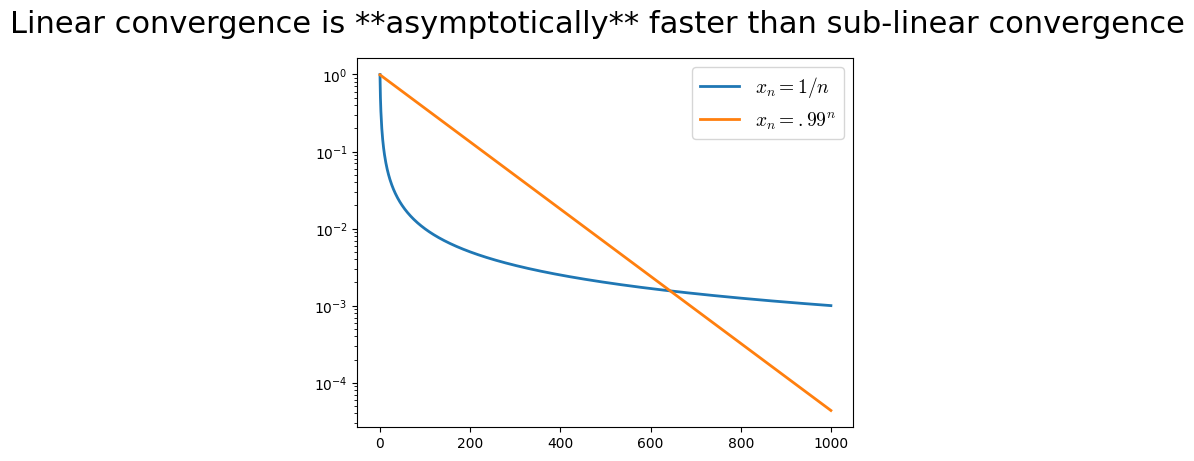

In [10]:
# Comparing the rates

fig, ax = plt.subplots()
ax.plot( n, 1/n, linewidth=2.0,label=r'$x_n = 1/n$')
ax.plot( n, .99**n, linewidth=2.0,label=r'$x_n = .99^n$')
ax.legend(fontsize=14,frameon=True)
ax.set_yscale('log')
fig.suptitle('Linear convergence is **asymptotically** faster than sub-linear convergence',fontsize=22);